In [1]:
import numpy as np
import torch as tch
import torch.nn as nn
import matplotlib.pyplot as plt

In [2]:
f = lambda x: 0.03*x**3 + 4*tch.cos(x)
xdata = tch.linspace(-10, 10, 1000).reshape(-1,1)
ydata = f(xdata) + tch.normal(0., 2., (1000,)).reshape(-1,1)

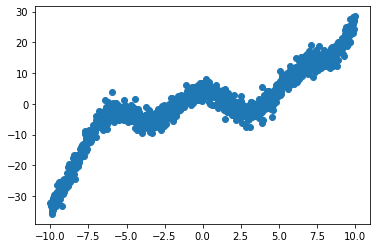

In [3]:
plt.scatter(xdata.flatten(), ydata.flatten());

In [4]:
xy_set = tch.utils.data.TensorDataset(xdata,ydata)
data_set = tch.utils.data.DataLoader(xy_set, batch_size=16, shuffle=True)

In [5]:
mod = nn.Sequential(
    nn.Linear(1, 32),
    nn.SELU(),
    nn.Linear(32,64),
    nn.SELU(),
    nn.Linear(64, 1)
)
optim = tch.optim.Adam(mod.parameters(), lr=0.002, weight_decay=1e-2)
loss_fn = nn.MSELoss()

In [6]:
for i in range(100):
  for x, y in data_set:
    y_hat = mod(x)
    loss = loss_fn(y_hat, y)

    optim.zero_grad()
    loss.backward()
    optim.step()

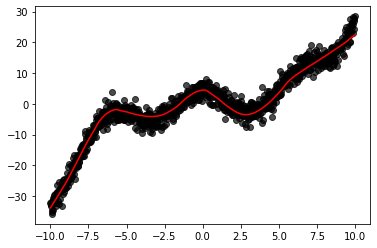

In [7]:
X = xy_set.tensors[0]
Y = xy_set.tensors[1].numpy().flatten()
y_pred = mod(X).detach().numpy()
plt.plot(X.numpy().flatten(), y_pred, c='r')
plt.scatter(X.numpy(), Y, alpha=0.7, c='k');